## Reparameterization Trick in Variational Autoencoders (VAEs)

In VAEs, we need to sample from a latent variable $z$ which follows a Gaussian distribution. However, we need this sampling process to be differentiable to apply gradient descent. To achieve this, we use the *reparameterization trick*. 

Given a latent variable:

$$
z \sim \mathcal{N}(\mu_\phi, \sigma^2_\phi)
$$

This indicates that $z$ follows a Gaussian distribution with mean $\mu_\phi$ and variance $\sigma^2_\phi$. Directly sampling $z$ from this distribution would not be differentiable. Instead, we sample an auxiliary variable $\epsilon$ from a standard normal distribution:

$$
\epsilon \sim \mathcal{N}(0,1)
$$

We then reparameterize $z$ using $\epsilon$:

$$
z = \mu_\phi + \sigma_\phi \cdot \epsilon
$$

##### Transformed Distribution is Gaussian
See figures below for a visualization.

##### Mean and Variance of $z$

- The mean of $z$ after reparameterization is $\mu_\phi$ since the expected value of $\epsilon$ is 0:

$$
\mathbb{E}[z] = \mathbb{E}[\mu_\phi + \sigma_\phi \cdot \epsilon] = \mu_\phi + \sigma_\phi \cdot \mathbb{E}[\epsilon] = \mu_\phi
$$

- The variance of $z$ after reparameterization is $\sigma^2_\phi$ since the variance of $\epsilon$ is 1, and the variance operator is linear with respect to scalar multiplication:

$$
\text{Var}(z) = \text{Var}(\mu_\phi + \sigma_\phi \cdot \epsilon) = \sigma^2_\phi \cdot \text{Var}(\epsilon) = \sigma^2_\phi
$$

Thus, $z$ is still Gaussian with the desired mean and variance, making the reparameterization trick a valid method for differentiable sampling in VAEs.


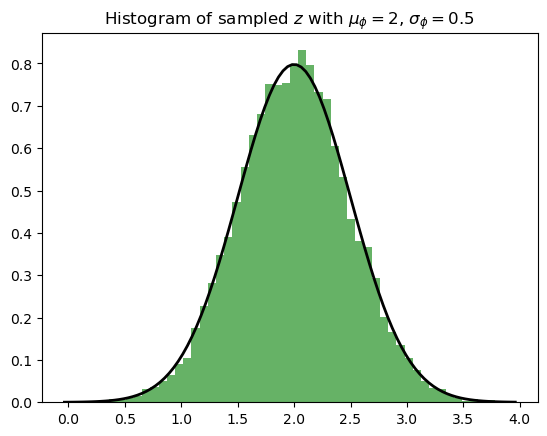

(2.0014153273581887, 0.49425494132736303)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mu_phi = 2    # mean
sigma_phi = 0.5  # standard deviation

# Sample epsilon from a standard normal distribution
epsilon = np.random.randn(10000)

# Reparameterize to sample z from the desired Gaussian distribution
z = mu_phi + sigma_phi * epsilon

# Plot the histogram of the sampled z values
plt.hist(z, bins=50, density=True, alpha=0.6, color='g')

# Plot the true Gaussian distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x - mu_phi)**2 / (2 * sigma_phi**2)) / (sigma_phi * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

title = "Histogram of sampled $z$ with $\mu_\phi={}$, $\sigma_\phi={}$".format(mu_phi, sigma_phi)
plt.title(title)
plt.show()
np.mean(z), np.std(z)

### A note on linear transformations of random variables

Transforming a random variable $X$ by a linear transformation $Y = aX + b$ results in a new random variable. The pdf is then shifted and scaled.

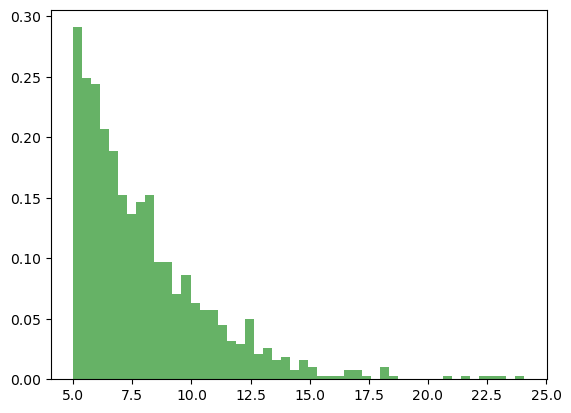

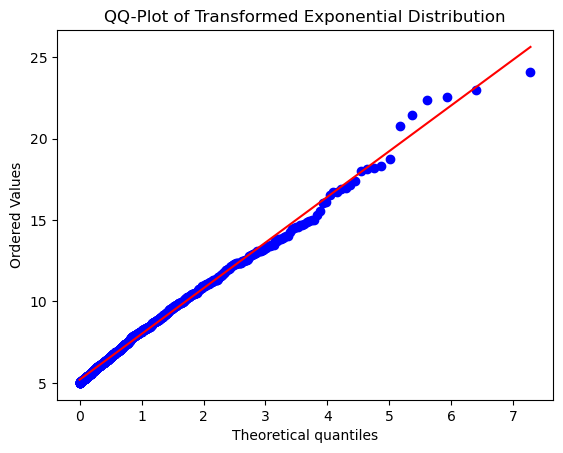

In [9]:
# Drawn 1000 samples from an exponential distribution
x = np.random.exponential(size=1000)
# do a linear transformation to get the desired mean and standard deviation
y = 5 + 3 * x
# do a qq-plot to compare the two distributions along with an histogram
import matplotlib.pyplot as plt
plt.hist(y, bins=50, density=True, alpha=0.6, color='g')
plt.show()
import scipy.stats as stats
stats.probplot(y, dist="expon", plot=plt)
plt.title('QQ-Plot of Transformed Exponential Distribution')
plt.show()



Sidenoate: While the shape stays the same, the transformed distribution is not an exponentional anymore.